In [3]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import analysis

packets = analysis.parse_packet_file('data/all.txt')
packets += analysis.parse_packet_file('data/temp_basals.txt')

# Select valid packets
packets = filter(lambda x: x.is_valid(), packets)

# Create a pandas dataframe
df = analysis.packets_to_pandas(map(lambda x: x.as_dict(), packets))

In [4]:
# Distribution of body lengths
df.body_len.value_counts()

10.0     4036
3.0      3004
7.0      1140
32.0     1005
31.0      113
5.0        76
12.0       23
50.0       11
6.0        10
21.0       10
36.0        6
24.0        5
29.0        5
25.0        5
23.0        5
205.0       3
126.0       2
0.0         2
157.0       1
Name: body_len, dtype: int64

In [5]:
# Select packets with body length of 10
fixed_length = df.loc[df["body_len"] == 10]


In [6]:
# Generate a correlation matrix of the message bits
bits = map(analysis.hex_unpackbits, list(fixed_length["raw_packet"].values))
bits_df = pd.DataFrame(bits)
corr = bits_df.corr()

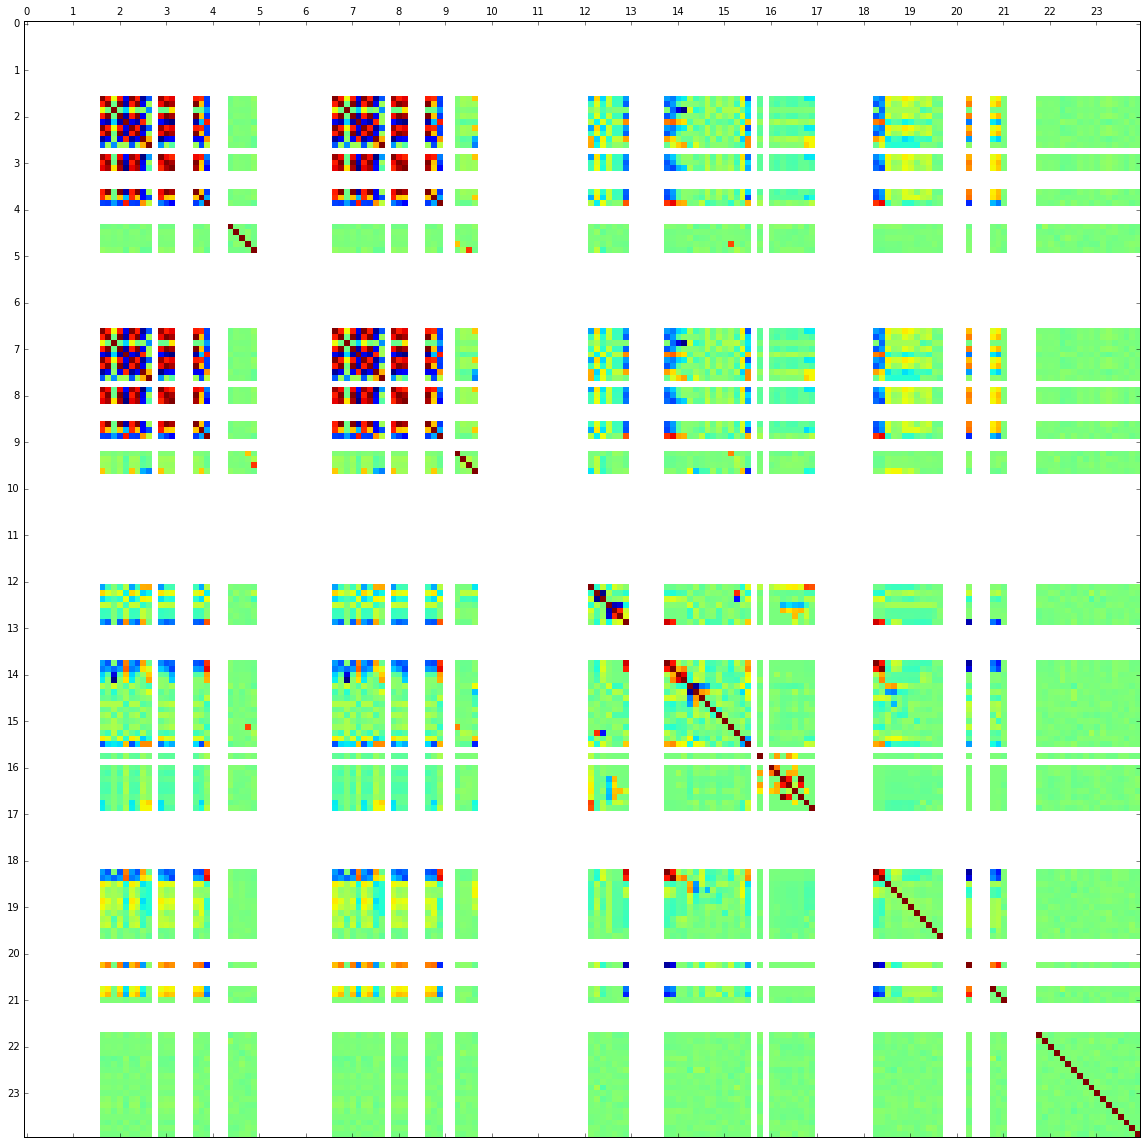

In [7]:
# Plot the correlation matrix
size=20
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
col_n = range(len(corr.columns)/8)
col_i = map(lambda x: x*8, col_n)
plt.xticks(col_i, col_n);
plt.yticks(col_i, col_n);

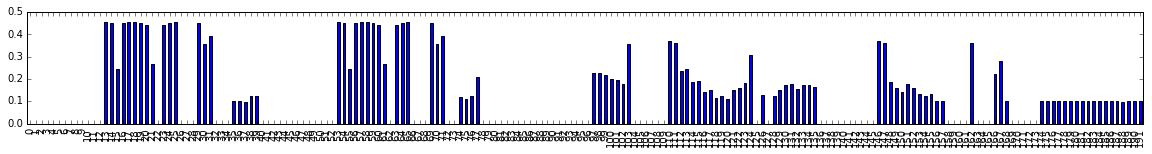

In [8]:
# Std Deviation of columns in the correlation matrix
# CRC bits should have low deviation; i.e. their correlation
# across all the other bits should be uniform
corr.std().plot('bar',figsize=(20,2)); None

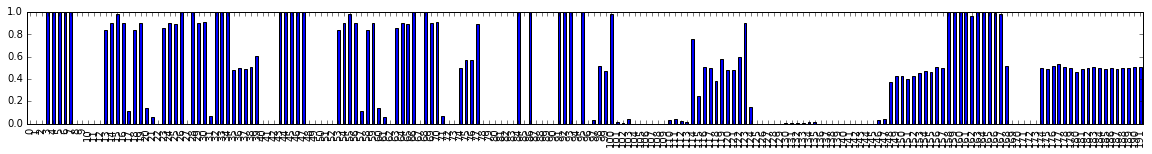

In [9]:
# Avg value of bits by column. Shows bias.
# CRC bits should have small bias (small bias = closer to 0.5)
bits_df.mean().plot('bar',figsize=(20,2)); None

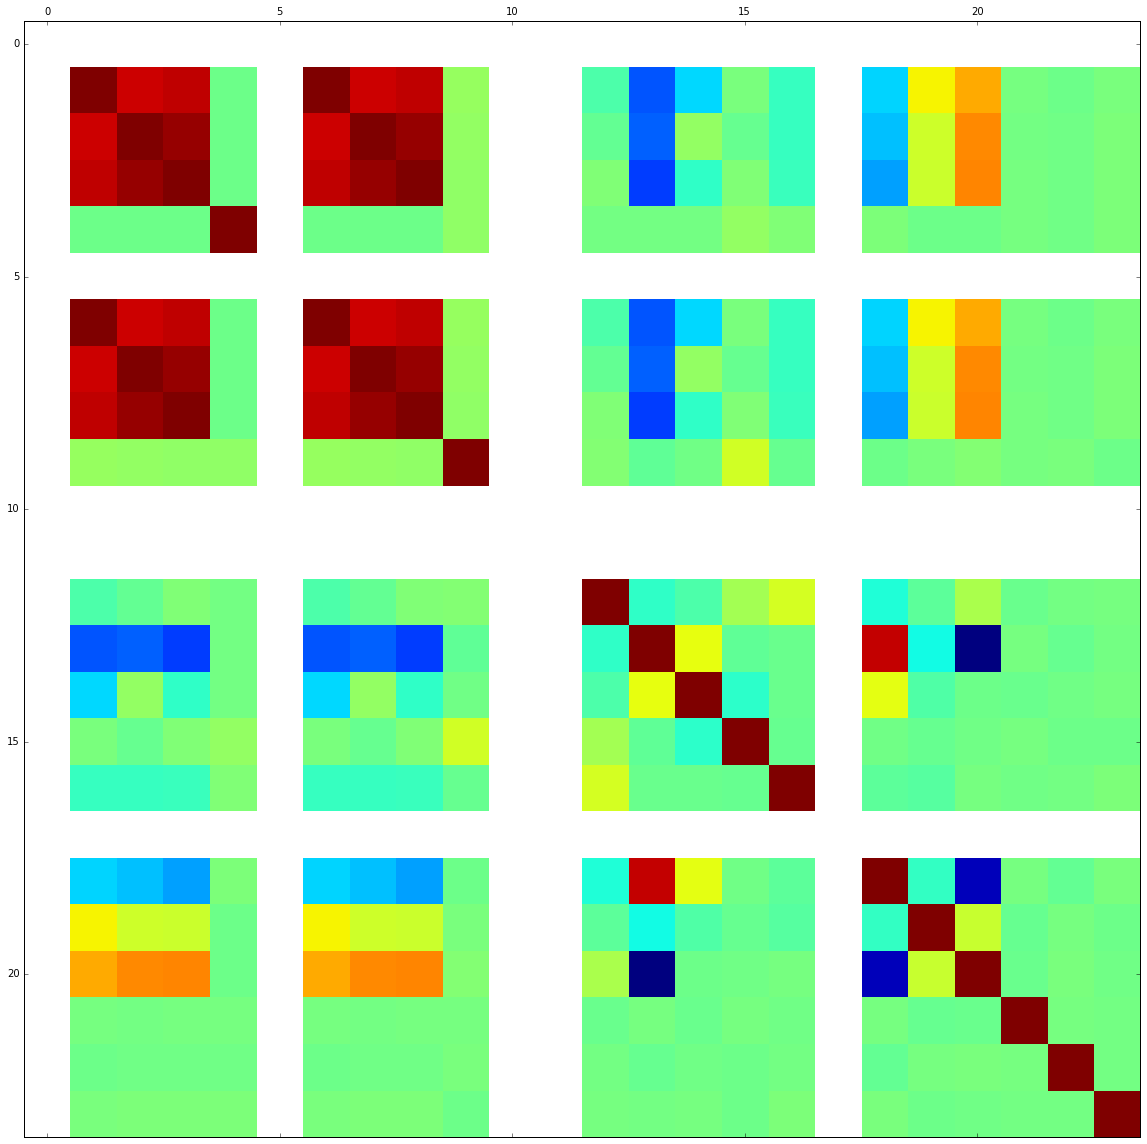

In [10]:
# Byte-wise correlation matrix

def hex_unpackbytes(hex_str):
    return np.frombuffer(hex_str.decode('hex'), dtype=np.uint8)

# Generate a correlation matrix of the message bits
bytes = map(hex_unpackbytes, list(fixed_length["raw_packet"].values))
bytes_df = pd.DataFrame(bytes)
corr = bytes_df.corr()

# Plot the correlation matrix
size=20
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)

